In [1]:
import numpy as np
import pandas as pd
import sympy as sym
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


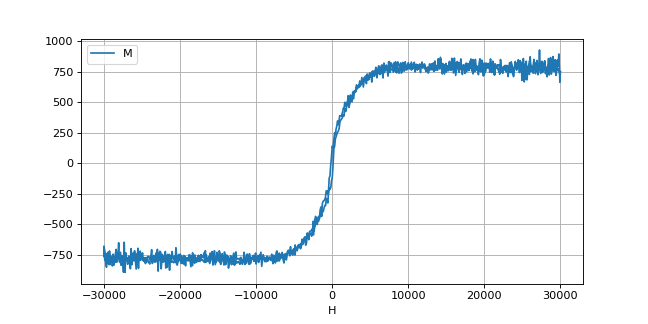

<AxesSubplot:xlabel='H'>

In [14]:
%matplotlib notebook

hyst1 = pd.read_csv('data/hyst1.csv', sep='\t')
#hyst1 = hyst1.sort_values(by='H')

hyst1.plot(x='H', y='M', grid=True, figsize=(8,4))

Text(0, 0.5, '$э.м.е./см^3$')

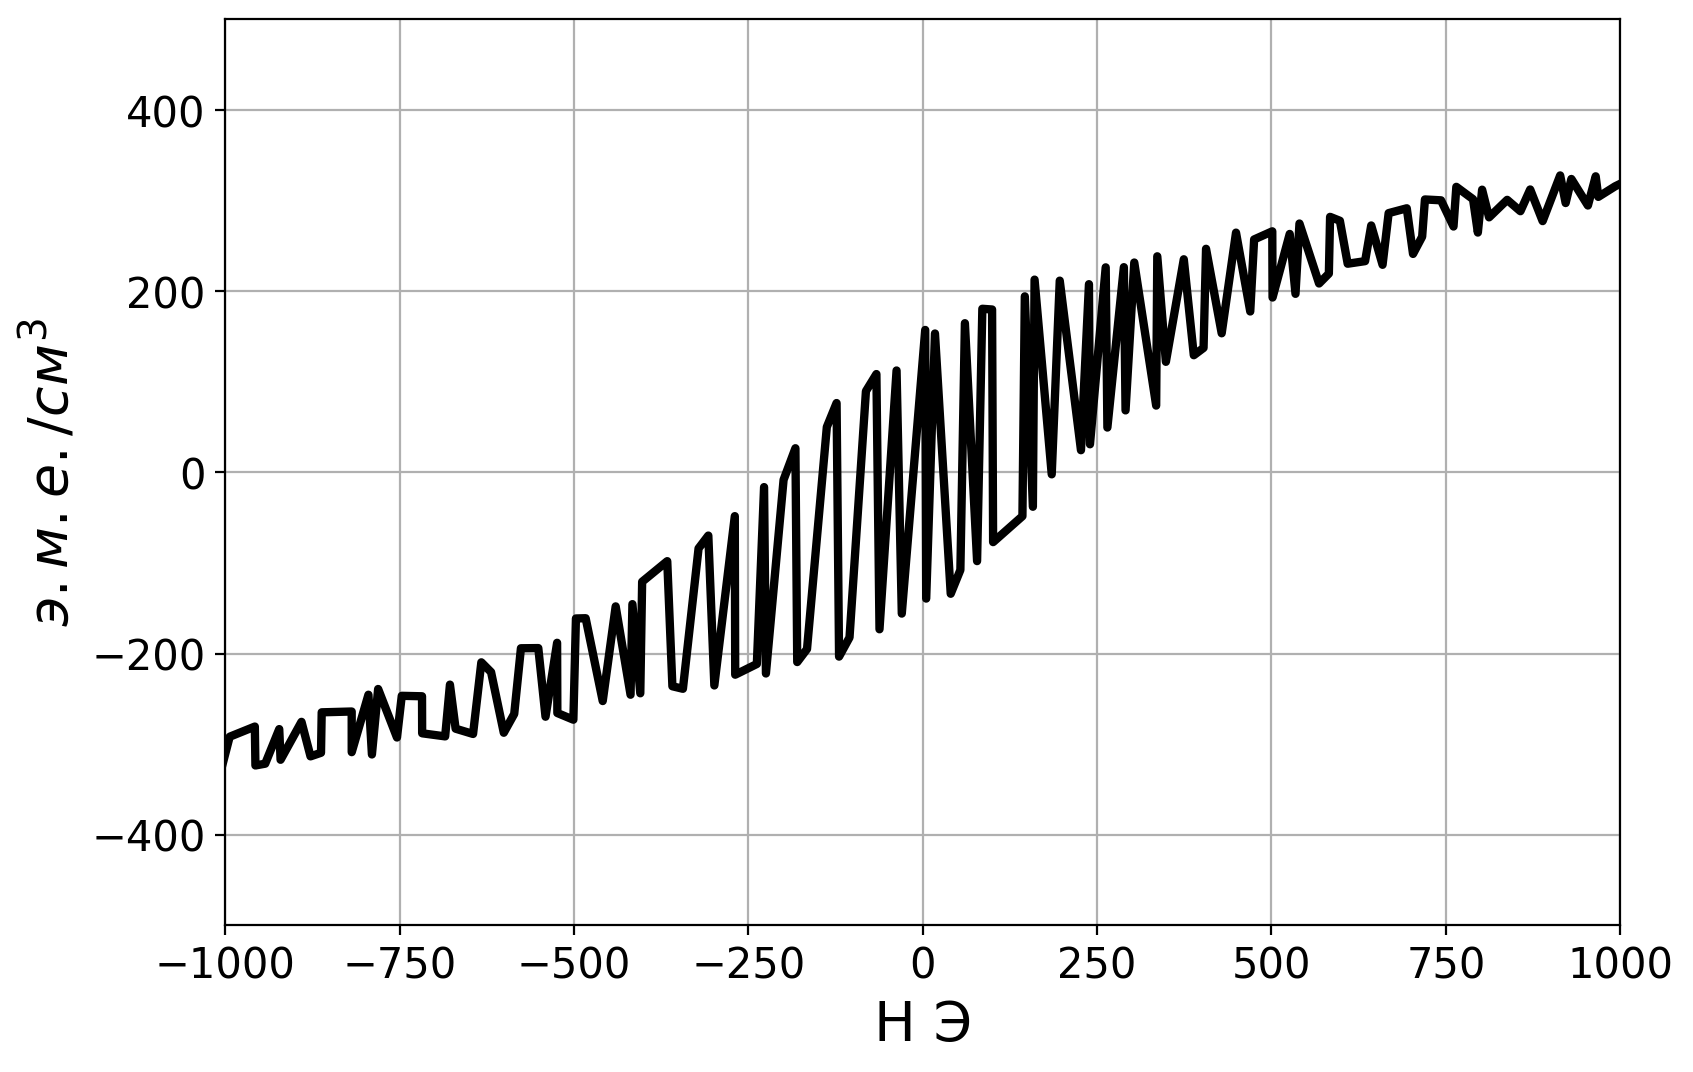

In [3]:
%matplotlib inline


plt.figure(figsize=(9,6), dpi=200)
hyst2 = pd.read_csv('data/hyst2.csv', sep='\t')
hyst2 = hyst2.sort_values(by='H')
#hyst2 = hyst2.iloc[0:1200]

plt.plot(hyst2.H, hyst2.M, color='k', linewidth=3)
plt.grid(True)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(-1000, 1000)
plt.ylim(-500, 500)

plt.xlabel("H Э", fontsize=20)
plt.ylabel(r"$э.м.е./см^3$", fontsize=20)


In [4]:
#         1 - more steeep 2 - less steep
def func_to_fit(x, A1, A2, S1, S2):
    v1 = np.maximum(-A1, np.minimum(A1, x*S1))
    v2 = np.maximum(-A2, np.minimum(A2, x*S2))
    return v1+v2

[2.94268461e+02 4.89015964e+02 3.36510729e-01 8.86085980e-02]
H0_1 = 5518.831982443689
Ms_est = 489.01596445638734


<IPython.core.display.Javascript object>


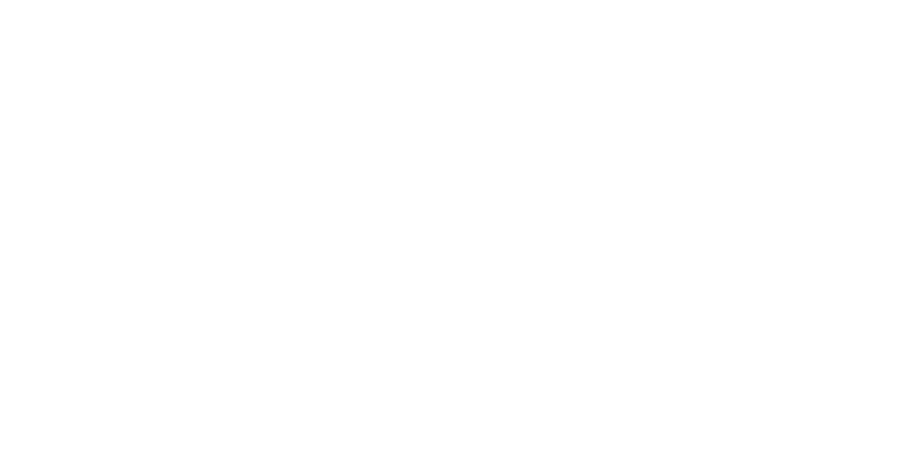

(-20000.0, 20000.0)

In [5]:
%matplotlib notebook
from scipy.optimize import curve_fit 


par1, ss1 = curve_fit(
    func_to_fit,
    hyst1.H,
    hyst1.M,
    p0=[300., 500., 3445.0e-4, 900.0e-4],
    maxfev=1000
)

print(par1)
H0_1 = par1[1]/par1[3]
print("H0_1 = {}".format(H0_1))
print("Ms_est = {}".format(par1[1]))

plt.figure(figsize=(8,4))
plt.plot()
plt.plot(hyst1.H, hyst1.M)
#plt.plot(hyst1.H, func_to_fit(hyst1.H, *par1))
plt.plot(hyst1.H, func_to_fit(hyst1.H, 0.,800.,1.,0.107))
plt.xlabel("H Э")
plt.ylabel(r"$э.м.е./см^3$")
plt.grid(True)
plt.xlim([-20e3, 20e3])


[3.39255571e+02 4.56912935e+02 3.19817553e-01 4.19868925e-02]
H0_2 = 10882.275589958583
Ms_est = 456.9129353537964


<IPython.core.display.Javascript object>


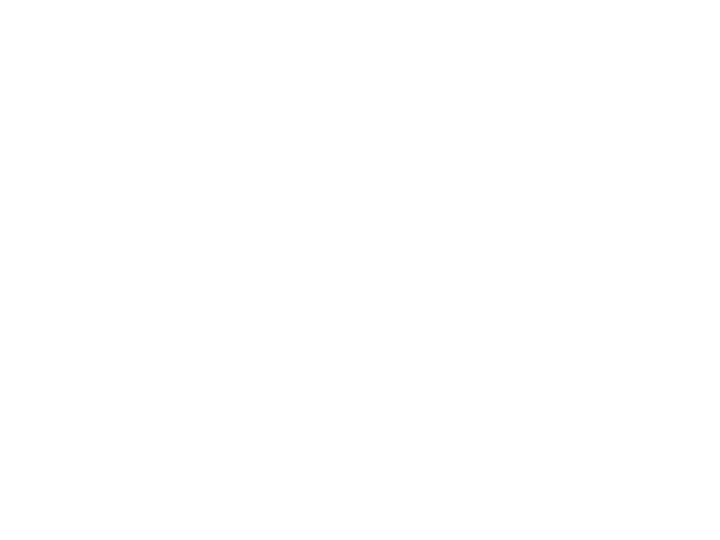

In [6]:
%matplotlib notebook
from scipy.optimize import curve_fit


par2, ss2 = curve_fit(
    func_to_fit,
    hyst2.H,
    hyst2.M,
    p0=[300., 500., 3445.0e-4, 400.0e-4],
    maxfev=1000
)

print(par2)
H0_2 = par2[1]/par2[3]
print("H0_2 = {}".format(H0_2))
print("Ms_est = {}".format(par2[1]))

plt.plot()
plt.plot(hyst2.H, hyst2.M)
plt.plot(hyst2.H, func_to_fit(hyst2.H, *par2))
plt.grid(True)

<IPython.core.display.Javascript object>


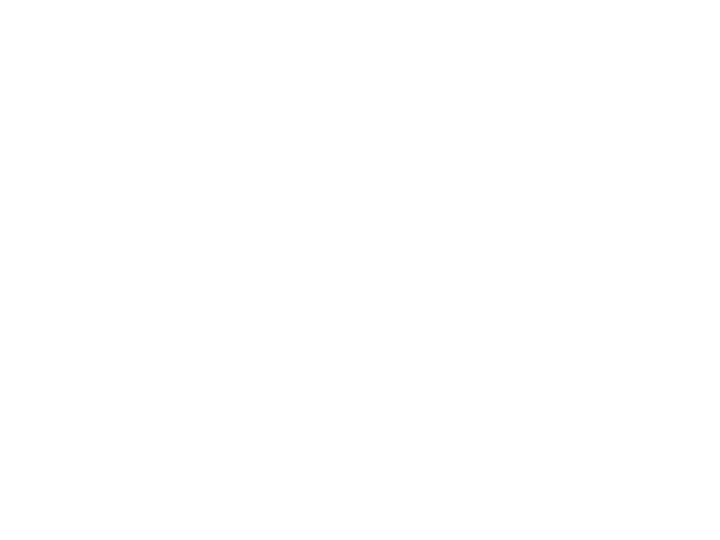

In [7]:
%matplotlib notebook
x = np.linspace(-30e3, 30e3, 1000)
plt.plot(x, np.maximum(-par1[1], np.minimum(par1[1], x*par1[3])))
plt.plot(x, np.maximum(-par2[1], np.minimum(par2[1], x*par2[3])))
plt.grid(True)

<IPython.core.display.Javascript object>


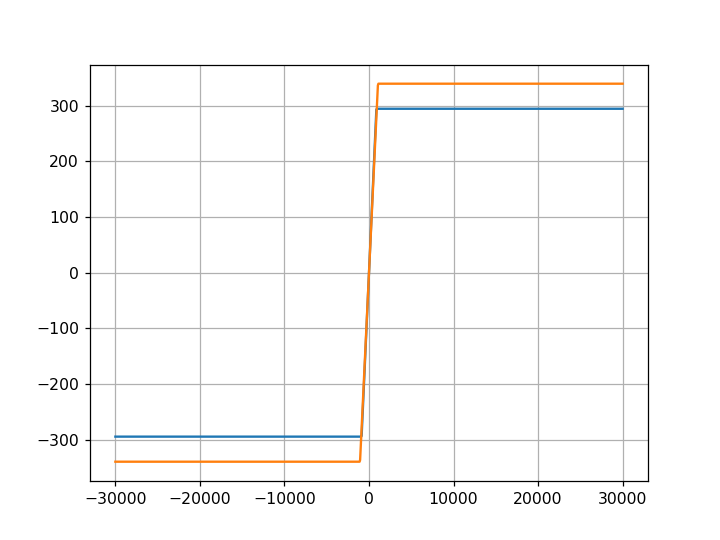

In [8]:
%matplotlib notebook
x = np.linspace(-30e3, 30e3, 1000)
plt.plot(x, np.maximum(-par1[0], np.minimum(par1[0], x*par1[2])))
plt.plot(x, np.maximum(-par2[0], np.minimum(par2[0], x*par2[2])))
plt.grid(True)

# Second order approximation

In [9]:
def Hk2KuJ(H1k1, H1k2, H2k, Ms, t):
    Ku_2ord = H1k2*Ms/4.
    Ku_1ord = (H1k1*Ms/2. - 2*Ku_2ord) + 2*np.pi*(Ms**2)
    J = (t/2.)*Ms*(H2k - H1k1)
    return Ku_1ord, Ku_2ord, J

In [10]:
def energy(tet, H, Ms, Ku_1ord, Ku_2ord):
    return (Ku_1ord - 2*np.pi*(Ms**2))*(np.sin(tet)**2) + Ku_2ord*(np.sin(tet)**4) - H*Ms*np.sin(tet)


def func_to_fit_2nd_order(Hx, H1k1, H1k2, Ms, C):
    Ku_1ord, Ku_2ord, J = Hk2KuJ(H1k1, H1k2, H1k1, Ms, 0.0)
    tets = np.linspace(0, 2*np.pi, 1000)
    ans = []
    Cp = []
    for H in Hx:
        Evs = energy(tets, H, Ms, Ku_1ord, Ku_2ord)
        ans.append(Ms*np.sin(tets[Evs.argmin()]))
        
        if H>0:
            Cp.append(C)
        else:
            Cp.append(-C)
    
    return np.array(ans) + np.array(Cp)

c:\users\sasha\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[7500.         6000.          730.32040611   58.75200198]

H1k1 = 7500.0
H1k2 = 6000.0
Ms_est = 730.3204061138099
Ku_1ord = 3898989.6294541173
Ku_2ord = 1095480.6091707149



Text(8, -70, '$H_{k1}=7500\\ Э$')

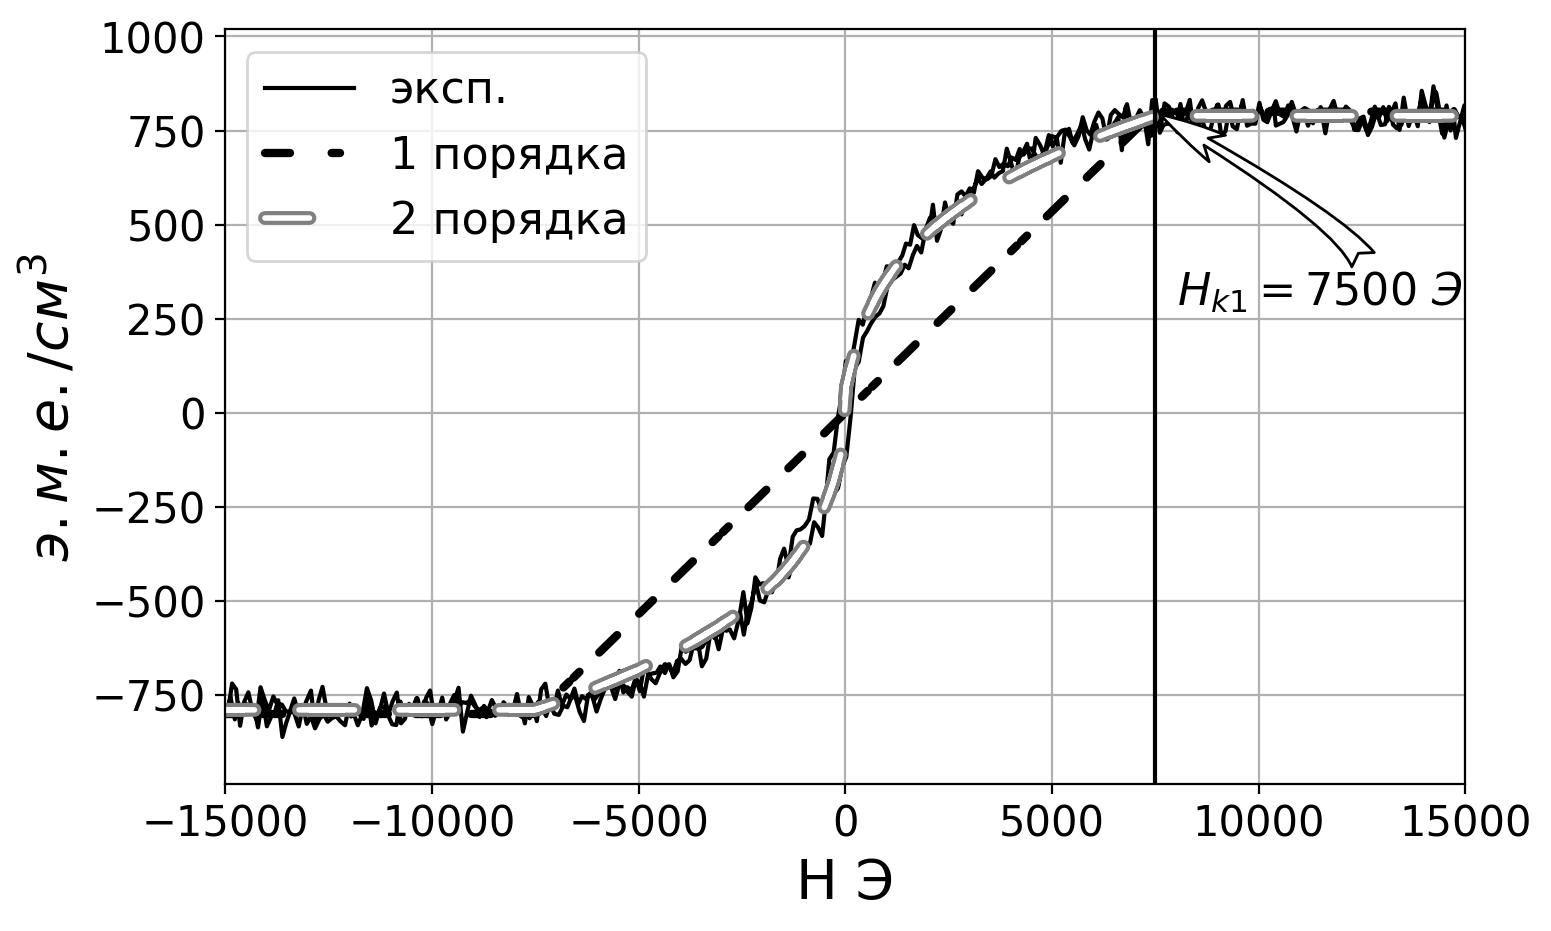

In [11]:
%matplotlib inline

import matplotlib.patheffects as pe
from scipy.optimize import curve_fit 




par, ss = curve_fit(
    func_to_fit_2nd_order,
    hyst1.H,
    hyst1.M,
    p0=          [7.5e3, 6e3, 600., 40.],
    #bounds = [(-np.inf, 6.4e3, 600., -np.inf),
    #          (+np.inf, 6.6e3, 630., +np.inf)],
    maxfev=1000
)

print(par)
print()

H1k1 = par[0]
H1k2 = par[1]
Ms_est = par[2]

print("H1k1 = {}".format(H1k1))
print("H1k2 = {}".format(H1k2))
print("Ms_est = {}".format(Ms_est))



Ku_1ord, Ku_2ord, J = Hk2KuJ(H1k1, H1k2, H1k1, Ms_est, 0.)

print("Ku_1ord = {}".format(Ku_1ord))
print("Ku_2ord = {}".format(Ku_2ord))
print()




plt.figure(figsize=(8,5), dpi=200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot()
plt.plot(hyst1.H, hyst1.M, color='black', label="эксп.")
plt.plot(hyst1.H, func_to_fit(hyst1.H, 0.,800.,1.,0.107), 
         color='black', label="1 порядка", linestyle=(0, (3, 5, 1, 10, 1, 5)), linewidth=3, dash_capstyle='round')
plt.plot(hyst1.H, func_to_fit_2nd_order(hyst1.H, *par),
         color='white', label='2 порядка', linewidth=2, linestyle=(0, (8, 10)),
         path_effects=[pe.Stroke(linewidth=5, foreground='grey'), pe.Normal()], dash_capstyle='round')
plt.legend(fontsize = 16)
plt.grid(True)
plt.xlim([-15e3, 15e3])
plt.xlabel("H Э", fontsize=20)
plt.ylabel(r"$э.м.е./см^3$", fontsize=20)
plt.savefig("graphs/hyst1", dpi=300)
plt.axvline(7500, 0, 1, color='k', linestyle='-')

plt.annotate(r"$H_{k1}=7500\ Э$", fontsize=16, xy=(7500, 800),  xycoords='data',
            xytext=(8, -70), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy,head_length=1.5,head_width=0.7,tail_width=0.6",
                            connectionstyle="angle3,angleA=0,angleB=-30",
                            fc="1", ec="0"))


In [12]:
def energy_2_layer(tet, H, Ms, Ku_1ord, Ku_2ord, J):
    Ev = (Ku_1ord - 2*np.pi*(Ms**2))*(np.sin(tet)**2) + Ku_2ord*(np.sin(tet)**4) - H*Ms*np.sin(tet)
    return 2*Ev - (J/12e-7)*np.cos(2.*tet)


def func_to_fit_2layer(Hx, H1k1, H1k2, H2k, Ms, C):
    Ku_1ord, Ku_2ord, J = Hk2KuJ(H1k1, H1k2, H2k, Ms, 12e-7)
    tets = np.linspace(0, 2*np.pi, 1000)
    ans = []
    Cp = []
    for H in Hx:
        Ess = energy_2_layer(tets, H, Ms, Ku_1ord, Ku_2ord, J)
        ans.append(Ms*np.sin(tets[Ess.argmin()]))
        
        if H>0:
            Cp.append(C)
        else:
            Cp.append(-C)
    
    return np.array(ans) + np.array(Cp)

[ 7500.          6500.         12500.           611.25747524
   194.87188354]

H1k1 = 7500.0
H1k2 = 6500.0
H2k = 12500.0
Ms_est = 611.2574752378384
Ku_1ord = 2653251.0845943512
Ku_2ord = 993293.3972614874
J = 1.833772425713515



c:\users\sasha\appdata\local\programs\python\python38\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(-30, -70, '$H_{k2}=12500\\ Э$')

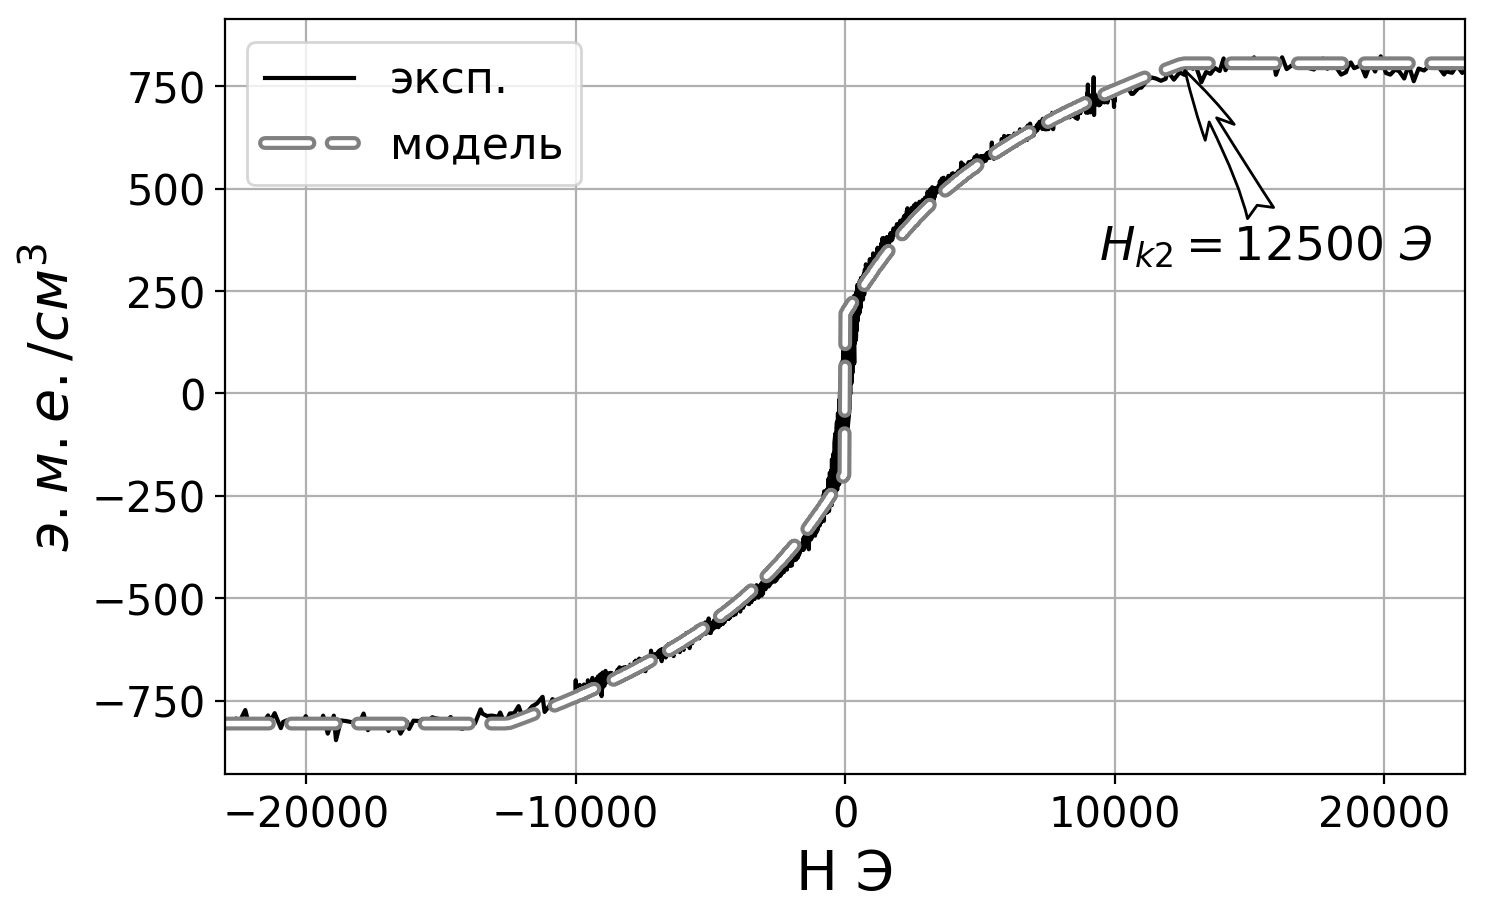

In [13]:
%matplotlib inline
from scipy.optimize import curve_fit 




par, ss = curve_fit(
    func_to_fit_2layer,
    hyst2.H,
    hyst2.M,
    p0=[7.5e3, 6.5e3, 12.5e3, 770., 0.],
    bounds = ([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf], 
              [ np.inf,  np.inf,  np.inf,  np.inf,  np.inf]),
    maxfev=1000
)

print(par)
print()

H1k1 = par[0]
H1k2 = par[1]
H2k = par[2]
Ms_est = par[3]

print("H1k1 = {}".format(H1k1))
print("H1k2 = {}".format(H1k2))
print("H2k = {}".format(H2k))
print("Ms_est = {}".format(Ms_est))



Ku_1ord, Ku_2ord, J = Hk2KuJ(H1k1, H1k2, H2k, Ms_est, 12e-7)

print("Ku_1ord = {}".format(Ku_1ord))
print("Ku_2ord = {}".format(Ku_2ord))
print("J = {}".format(J))
print()




plt.figure(figsize=(8,5), dpi=200)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot()
plt.plot(hyst2.H, hyst2.M, color='black', label='эксп.')
plt.plot(hyst2.H, func_to_fit_2layer(hyst2.H, *par),
         color='white', label='модель', linewidth=2, linestyle=(0, (8, 4)), 
         path_effects=[pe.Stroke(linewidth=5, foreground='grey'), pe.Normal()], dash_capstyle='round')
plt.grid(True)
plt.xlim([-23e3, 23e3])
plt.legend(fontsize = 16)
plt.xlabel("H Э", fontsize=20)
plt.ylabel(r"$э.м.е./см^3$", fontsize=20)


plt.annotate(r"$H_{k2}=12500\ Э$", fontsize=17, xy=(12500, 800),  xycoords='data',
            xytext=(-30, -70), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy,head_length=1.5,head_width=0.7,tail_width=0.6",
                            connectionstyle="angle3,angleA=0,angleB=-60",
                            fc="1", ec="0"))
